In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0x0

# TASK 1 (4 Points): K-Means using scikit-learn

First we will generate some data. The variable `X` will contain the data used in this section.

In [3]:
from sklearn.datasets import make_blobs

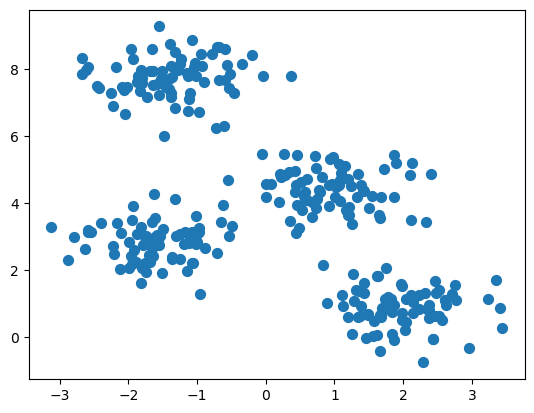

In [4]:
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=.6,
    random_state=RANDOM_SEED,
)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 1a

Cluster the above data using the K-Means implementation provided by scikit-learn.
Refer to the official documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

* create an instance of the class `sklearn.cluster.KMeans`
* choose a suitable value for the `n_clusters` parameter
* call the `.fit` method to compute the clustering
* call the `.predict` method to get cluster labels for each data point

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_SEED)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

# Print results
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nCluster Labels:")
print(cluster_labels)

Cluster Centers:
[[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]

Cluster Labels:
[0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Task 1b

Try different numbers of clusters, compute the average silhouette scores using
`sklearn.metrics.silhouette_score` and plot the silhouette plot for the different values of K. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score>



In [7]:
from sklearn.metrics import silhouette_score

c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\c

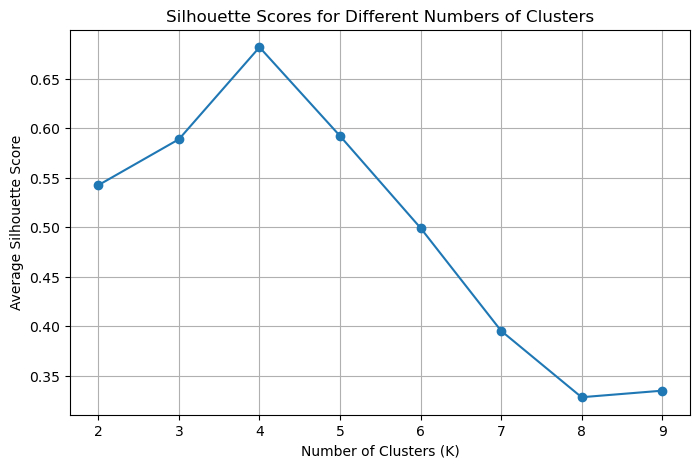

In [8]:
range_n_clusters = range(2, 10)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED)

    cluster_labels = kmeans.fit_predict(X)

    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

### Task 1c

Select the number of clusters K using the silhouette method. Visualize the resulting clustering for in a scatter plot by using different colors for each cluster and also depicting the cluster centroids.

Optimal number of clusters (K): 4


c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


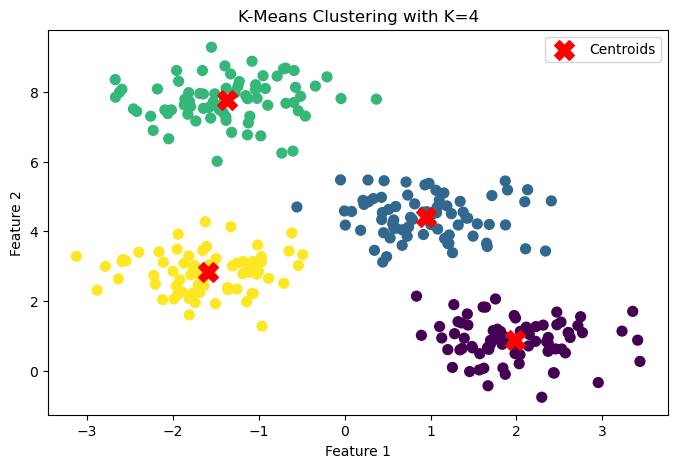

In [9]:
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K): {optimal_k}")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=RANDOM_SEED)
cluster_labels_optimal = kmeans_optimal.fit_predict(X)

# Visualize the clustering results
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_optimal, cmap='viridis', s=50)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## 📢 **HAND-IN** 📢:
1. The plot of the average silhouette scores for different values of K
2. The optimal K you selected based on the plots of the silhouette scores
3. The scatter plot of the clustering results depicting also the centroids for the optimal K

# TASK 2: DBSCAN

First, let's setup the data used in this section. We will redefine the variable `X` containing the data to be clustered.

In [10]:
from sklearn.datasets import make_moons

In [11]:
X, _ = make_moons(
    n_samples=200,
    noise=.05,
    random_state=RANDOM_SEED,
)

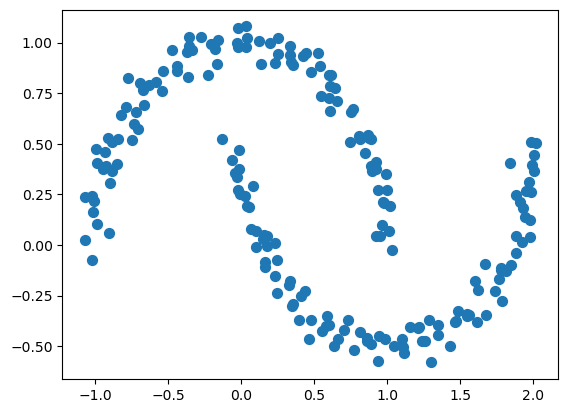

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 2a

* cluster the new data `X` using `KMeans`
* set `n_clusters=2`
* visualize and analyse the resulting clustering
* What do you think of the result?

c:\Users\mettl\anaconda3\envs\ComputerScience\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


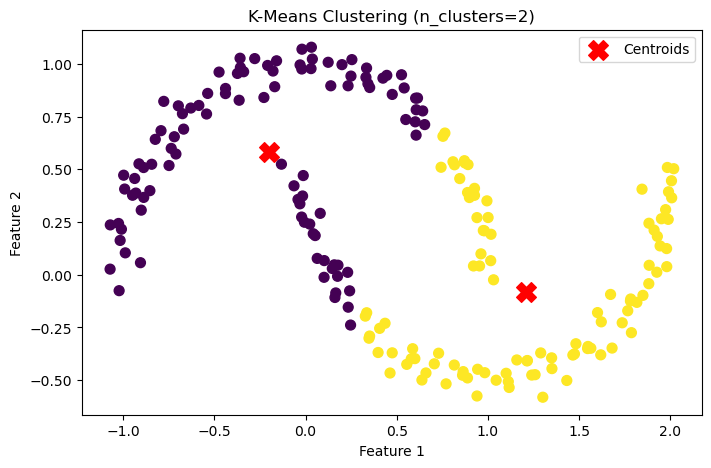

In [13]:
kmeans = KMeans(n_clusters=2, random_state=RANDOM_SEED)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

# Plot the resulting clustering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title("K-Means Clustering (n_clusters=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Task 2b

Let's use `sklearn.cluster.DBSCAN` instead. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>

* cluster the data using `DBSCAN`
* try different values for `eps` and `min_samples` until you manage to obtain good clustering of the two half-moons

In [14]:
from sklearn.cluster import DBSCAN

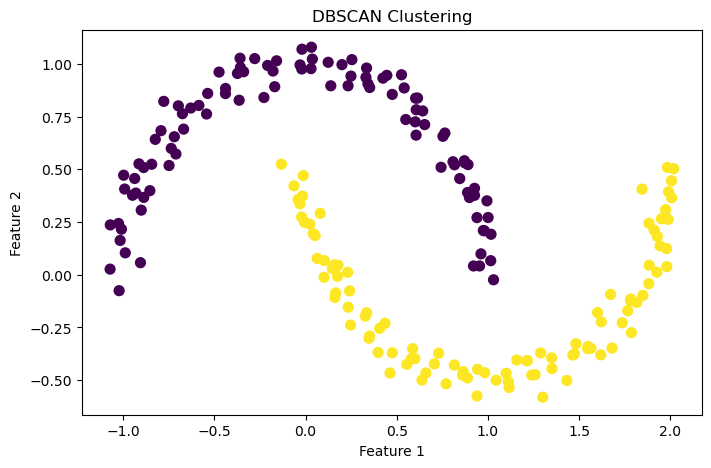

In [15]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the resulting clustering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 📢 **HAND-IN** 📢: No submission needed for this task.

# Task 3 (6 Points): Image Compression - Color Clustering in Images

K-Means can be used for image compression. This task focuses on appling this compression technique to an image.

We provide some useful helper functions below. Read the comments in the code carefully, but do not worry if you don't understand every line.


In [16]:
from PIL import Image
import requests
from io import BytesIO

In [17]:
def download_img(url: str) -> Image:
  """
  This function fetches an image from the internet and returns a PIL.Image object
  see: https://pillow.readthedocs.io/en/stable/reference/Image.html

  we tested it mainly on images from wikimedia
  """

  # have to set a fake user-agent so we dont get blocked by wikimedia
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
  r = requests.get(url, headers=headers)
  if r.status_code != 200:
    # if you hit this exception, consider using another image
    raise Exception(f"download failed:\n{url}")

  return Image.open(BytesIO(r.content)).convert("RGB")

def img2arr(img: Image) -> np.array:
  """
  convert a PIL.Image object to a numpy array
  the resulting array has 3 dimensions [height, width, 3]
  the last dimension contains rgb values

  the rgb values are normalized to be between 0. and 1.
  """
  return np.asarray(img) / 255

def arr2img(arr: np.array) -> Image:
  """
  convert a numpy array back into a PIL.Image object
  we expect the rgb values of the array to be between 0. and 1.
  """
  return Image.fromarray((arr * 255).astype(np.int8), mode="RGB")

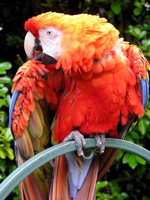

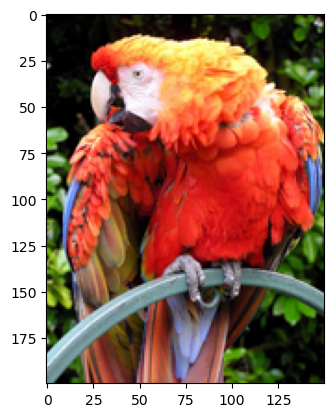

In [18]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"

img = download_img(img_url)

# you can visualize a PIL.Image object directly in jupyter using `display`
display(img)

img_arr = img2arr(img)

# visualize the np.array version of the same image
plt.imshow(img_arr)

In [19]:
from typing import Optional

def rg_chromaticity(color_arr: np.array) ->  np.array:
  """
  helper function
  """
  sums = np.sum(color_arr, axis=1, keepdims=True)
  normed = np.divide(color_arr, sums, where=sums > 0.)
  return normed

def rg_chroma_plot(img_arr: np.array, centers: Optional[np.array] = None):
  """
  plot an image in rg-chromaticity space
  this is a 2D representation of 3D rgb data
  refer to wikipedia for details: https://en.wikipedia.org/wiki/Rg_chromaticity

  Note: the resulting plot will not accurately reflect the original euclidean distances

  inputs:
  img_arr: a numpy array with 3 dimensions [height, width, 3] representing an image
  centers: a numpy array with 2 dimensions [n_centers, 3] representing the cluster centers
  """
  colors = np.copy(img_arr).reshape((-1, 3))
  colors = np.unique(colors, axis=0)
  img_rg = rg_chromaticity(colors)
  plt.scatter(img_rg[:, 0], img_rg[:, 1], c=[tuple(colors[i]) for i in range(colors.shape[0])], s=.1)

  if centers is not None:
    crg = rg_chromaticity(centers)
    plt.scatter(crg[:, 0], crg[:, 1], c="black", marker="x", s=25.)

  plt.xlabel("red")
  plt.ylabel("green")
  plt.show()


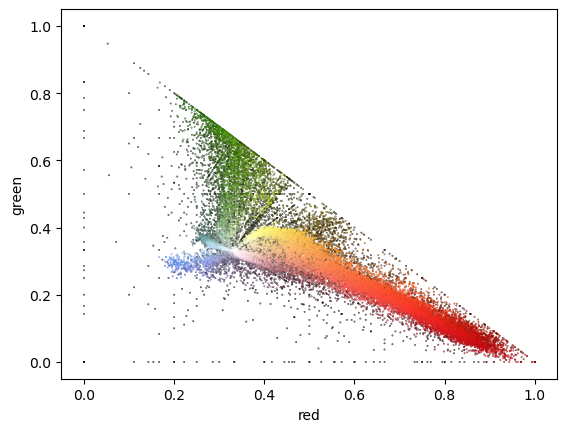

In [20]:
rg_chroma_plot(img_arr)

In [21]:
from sklearn.metrics import pairwise_distances_argmin

def replace_nearest_color(img_arr: np.array, centers: np.array):
  """
  replace each pixel color in `img_arr` by the closest color in `centers`

  input:
  img_arr: a numpy array with 3 dimensions [height, width, 3] representing an image
  centers: a numpy array with 2 dimensions [n_centers, 3] representing the cluster centers
  """
  colors = img_arr.reshape((-1, 3))
  labels = pairwise_distances_argmin(colors, centers)
  compressed = labels.reshape(img_arr.shape[:2])
  replaced = centers[compressed]
  return replaced


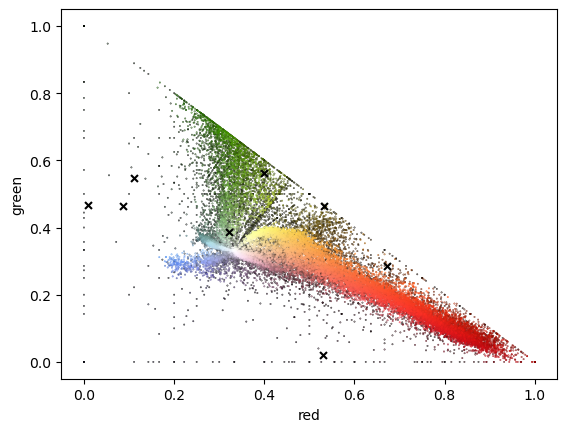

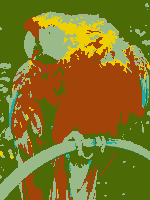

In [22]:
# generate 8 random colors for illustration
random_centers = np.random.default_rng(RANDOM_SEED).random(size=(8, 3))

# plot the random centers on top of the colors of the image
rg_chroma_plot(img_arr, random_centers)

# replace original colors by their nearest neighbors out of the candidate centers
replaced = replace_nearest_color(img_arr, random_centers)

# convert to PIL.Image and visualize
display(arr2img(replaced))

### Task 3 (continued)

* Use an image from [wikimedia](https://commons.wikimedia.org/wiki/Main_Page) to compress. Make sure that it is not too big, e.g. less than 1000px per side

* You can also use the same image we used in the example above

* download the image and convert it to a numpy array using the functions `download_img` and `img2arr` we defined above  

* Cluster the colors in the image using `KMeans`

* Choose the appropriate hyperparameters and verify them (e.g. using `silhouette_score` or the elbow method)

* Visualize your final cluster centers using `rg_chroma_plot` (see example usage above)

* Replace the colors of the original image by their nearest center using `replace_nearest_color` and display the result (see example usage above)

### Tips

* The images have 3 dimensions but the clustering algorithms expect 2. You can use [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) to obtain the dimension you need.
* To download the images you can right-click and save them to your computer.

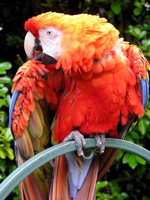

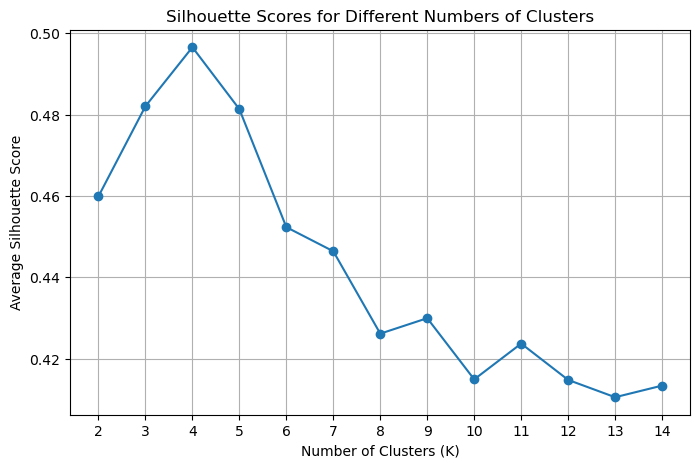

In [43]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"

img = download_img(img_url)
# you can visualize a PIL.Image object directly in jupyter using `display`
display(img)
img_arr = img2arr(img)
# visualize the np.array version of the same image
flat_img = img_arr.reshape(-1, 3)

range_n_clusters = range(2, 15)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED)

    cluster_labels = kmeans.fit_predict(flat_img)

    score = silhouette_score(flat_img, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

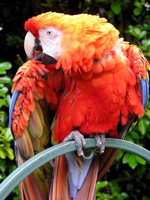

Silhouette Score: 0.49655520577087997


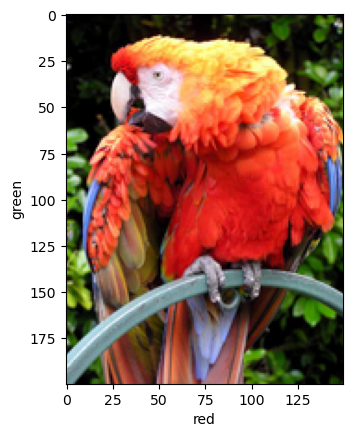

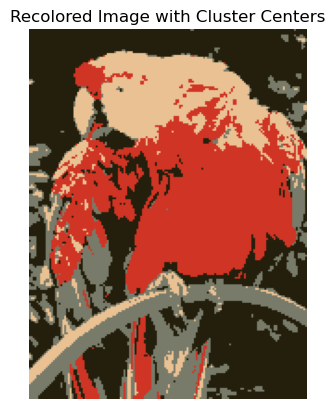

In [45]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/d/d7/RGB_24bits_palette_sample_image.jpg"

img = download_img(img_url)
# you can visualize a PIL.Image object directly in jupyter using `display`
display(img)
img_arr = img2arr(img)
# visualize the np.array version of the same image
plt.imshow(img_arr)
flat_img = img_arr.reshape(-1, 3)


# Step 1: Determine the optimal number of clusters
range_n_clusters = range(2, 20)
silhouette_scores = []

# Step 2: Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=RANDOM_SEED)
kmeans.fit_predict(flat_img)
cluster_centers = kmeans.cluster_centers_
silhouette = silhouette_score(flat_img, kmeans.labels_)
print(f"Silhouette Score: {silhouette}")

rg_chroma_plot(img_arr, cluster_centers)
replaced_img_arr = replace_nearest_color(img_arr, cluster_centers)

# Convert back to image and display
replaced_img = arr2img(replaced_img_arr)
plt.imshow(replaced_img)
plt.axis('off')
plt.title("Recolored Image with Cluster Centers")
plt.show()

## 📢 **HAND-IN** 📢:

* The original image you used for this task if different than the example image

* The final (compressed) image showing the replaced colors

* Your code for computing the clustering

* Short (2-3 sentences) description on how you verified the clustering and selected the hyperparameters
